In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random



--- 
 - XOR 문제 - 다층 퍼셉트론 구현하기 
   - 이번 챕터에서는 파이토치를 사용해서 다층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다. 
   - 파이토치에서는 앞에서 배운 역전파가 아래의 두 줄의 코드로서 구현됩니다. 


In [2]:


device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(777)

if device == "cuda":
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)



--- 
 ![image](https://user-images.githubusercontent.com/5696570/88937137-b295c380-d2be-11ea-87ee-be04e741164f.png) 


In [3]:

model = nn.Sequential(
    nn.Linear(2, 10, bias=True),  # input_layer = 2, hidden_layer1 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),  # hidden_layer1 = 10, hidden_layer2 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),  # hidden_layer2 = 10, hidden_layer3 = 10
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),  # hidden_layer3 = 10, output_layer = 1
    nn.Sigmoid()
).to(device)

mu.log("model", model)




model : 
    Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): Sigmoid()
      (2): Linear(in_features=10, out_features=10, bias=True)
      (3): Sigmoid()
      (4): Linear(in_features=10, out_features=10, bias=True)
      (5): Sigmoid()
      (6): Linear(in_features=10, out_features=1, bias=True)
      (7): Sigmoid()
    ) 
    torch.Size([10, 2]) tensor([[-0.5913, -0.0125],
            [-0.1368, -0.1613],
            [ 0.5393,  0.5390],
            [ 0.3171,  0.0046],
            [ 0.4594, -0.3346],
            [-0.2669,  0.1340],
            [-0.5527,  0.1716],
            [ 0.3324,  0.6927],
            [ 0.5890, -0.2480],
            [ 0.5254,  0.5479]])
    torch.Size([10]) tensor([ 0.5707, -0.3955, -0.1420, -0.3777,  0.6238,  0.5911,  0.5589, -0.0933,
            -0.4917, -0.2611])
    torch.Size([10, 10]) tensor([[-0.0777,  0.0738,  0.0224,  0.3143, -0.0773,  0.2872,  0.2076,  0.0923,
              0.0344, -0.0821],
            [-0.2722, -0.0

--- 
 - 이제 비용 함수와 옵타마이저를 선언합니다. 
 - nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수입니다. 


-------------------------------------------------------------------------------- 
epoch :    0/10000 
cost : 0.694898 

-------------------------------------------------------------------------------- 
epoch : 1000/10000 
cost : 0.693138 

-------------------------------------------------------------------------------- 
epoch : 2000/10000 
cost : 0.693117 

-------------------------------------------------------------------------------- 
epoch : 3000/10000 
cost : 0.693076 

-------------------------------------------------------------------------------- 
epoch : 4000/10000 
cost : 0.692910 

-------------------------------------------------------------------------------- 
epoch : 5000/10000 
cost : 0.682082 

-------------------------------------------------------------------------------- 
epoch : 6000/10000 
cost : 0.001303 

-------------------------------------------------------------------------------- 
epoch : 7000/10000 
cost : 0.000484 

----------------------------------------

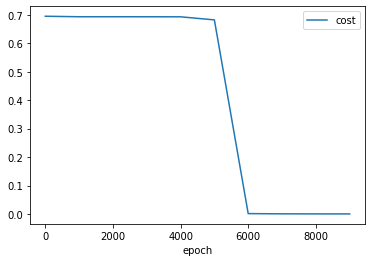

In [4]:

criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)
nb_epochs = 10000
mu.plt_init()

for epoch in range(nb_epochs):
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        mu.log_epoch(epoch, nb_epochs, cost)

mu.plt_show()



--- 
 - 다층 퍼셉트론의 예측값 확인하기 
   - 이제 모델이 XOR 문제를 풀 수 있는지 테스트 해봅시다. 


In [5]:


with torch.no_grad():
    hypothesis = model(X)
    mu.log("hypothesis", hypothesis)
    predicted = (hypothesis > 0.5).float()
    mu.log("predicted", predicted)
    accuracy = (predicted == Y).float().mean()
    mu.log("Y", Y)
    mu.log("accuracy", accuracy)


hypothesis : 
    torch.Size([4, 1]) tensor([[1.1176e-04],
            [9.9983e-01],
            [9.9984e-01],
            [1.8542e-04]])

predicted : 
    torch.Size([4, 1]) tensor([[0.],
            [1.],
            [1.],
            [0.]])

Y : 
    torch.Size([4, 1]) tensor([[0.],
            [1.],
            [1.],
            [0.]])

accuracy : 
    torch.Size([]) 1.0

